In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
# import seaborn as sns

dataset = pd.read_csv("../data/logfile-v5.csv", delimiter=";")
dataset.head()

/tmp/ipykernel_481587/745134221.py:7: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("../data/logfile-v5.csv", delimiter=";")


,time,datacenter_name,host_id,type,active,number_of_pes,available_pes,mips,available_mips,utilization_per_pe,ram,available_ram,bw,available_bw,power_model,vms,Unnamed: 16
0,300.01,Datacenter_1,0,host,True,2,1,6000,2387.365877,"3000.0,0.0:3000.0,2387.3658765866667:",4000,3983.0,1000,0.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,0.0:2,433.04793488,...",NaN
1,600.01,Datacenter_1,0,host,True,2,1,6000,2387.365877,"3000.0,0.0:3000.0,2387.3658765866667:",4000,3983.0,1000,0.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,0.0:2,433.04793488,...",NaN
2,900.01,Datacenter_1,0,host,True,2,1,6000,2387.365877,"3000.0,0.0:3000.0,2387.3658765866667:",4000,3983.0,1000,0.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,0.0:2,433.04793488,...",NaN
3,1200.01,Datacenter_1,0,host,True,2,1,6000,2387.365877,"3000.0,0.0:3000.0,2387.3658765866667:",4000,3983.0,1000,0.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,0.0:2,433.04793488,...",NaN
4,1500.01,Datacenter_1,0,host,True,2,1,6000,2387.365877,"3000.0,0.0:3000.0,2387.3658765866667:",4000,3983.0,1000,0.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,0.0:2,433.04793488,...",NaN


In [10]:
labels = np.unique(dataset['datacenter_name'])
datacenter_totalMIPS = np.array([])
datacenter_availableMIPS = np.array([])
datacenter_totalRAM = np.array([])
datacenter_availableRAM = np.array([])
datacenter_totalBW = np.array([])
datacenter_availableBW = np.array([])

datacenter_hosts = np.array([])
for i in range(len(labels)):
    totalMIPS = 0
    availableMIPS = 0
    totalRAM = 0
    availableRAM = 0
    totalBW = 0
    availableBW = 0
    datacenter = np.array([])
    
    
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():        
        totalMIPS += sample['mips']
        availableMIPS += sample['available_mips']
        
        totalRAM += sample['ram']
        availableRAM += sample['available_ram']
        
        totalBW += sample['bw']
        availableBW += sample['available_bw']
        
        host = {
            
        }
    
    datacenter_totalMIPS = np.append(datacenter_totalMIPS, totalMIPS)
    datacenter_availableMIPS = np.append(datacenter_availableMIPS, availableMIPS)
    datacenter_totalRAM = np.append(datacenter_totalRAM, totalRAM)
    datacenter_availableRAM = np.append(datacenter_availableRAM, availableRAM)
    datacenter_totalBW = np.append(datacenter_totalBW, totalBW)
    datacenter_availableBW = np.append(datacenter_availableBW, availableBW)

# x = np.arange(len(labels))
# datacenter_usedMIPS = np.subtract(datacenter_totalMIPS, datacenter_availableMIPS)
# datacenter_usedRAM = np.subtract(datacenter_totalRAM, datacenter_availableRAM)
# datacenter_usedBW = np.subtract(datacenter_totalBW, datacenter_availableBW)

# print(datacenter_usedMIPS)
# print(datacenter_usedRAM)
# print(datacenter_usedBW)
# bar_width = 0.2
# plt.bar(x, np.divide(datacenter_usedMIPS, datacenter_totalMIPS)*100, bar_width, label="MIPS")
# plt.bar(x + bar_width, np.divide(datacenter_usedRAM, datacenter_totalRAM)*100, bar_width, label="RAM")
# plt.bar(x - bar_width, np.divide(datacenter_usedBW, datacenter_totalBW)*100, bar_width, label="BW")

# plt.xticks(x, labels)
# plt.xlabel("Datacenters")
# plt.ylabel("Resource utilization in percentage")
# plt.title("Resource utilization per datacenter")
# plt.legend()
# plt.show()

## Energy Consumption

### Max Energy Consumption

The datacenter 'Datacenter_1' current computing infrastructure at max can consume 69.465 kW per hour


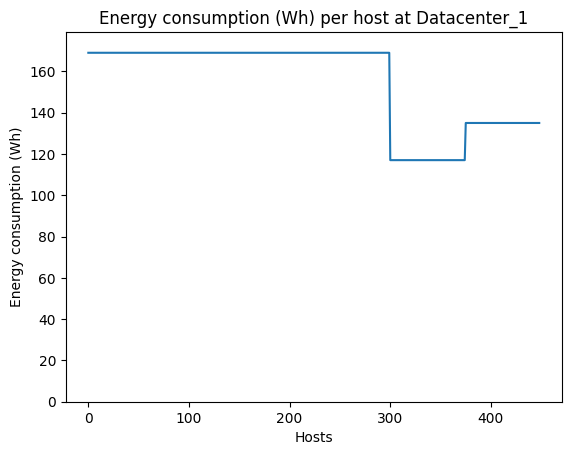

The datacenter 'Datacenter_2' current computing infrastructure at max can consume 54.21 kW per hour


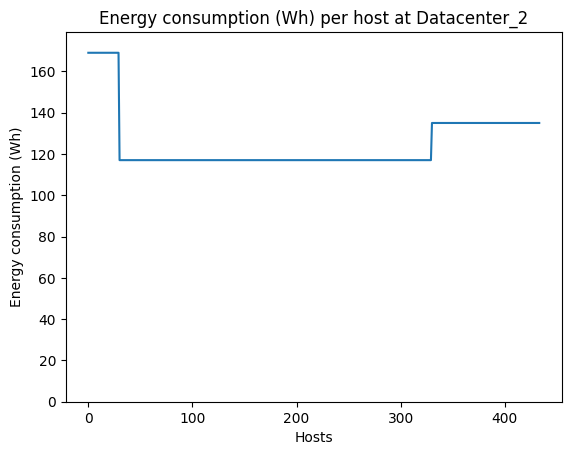

The datacenter 'Datacenter_3' current computing infrastructure at max can consume 47.385 kW per hour


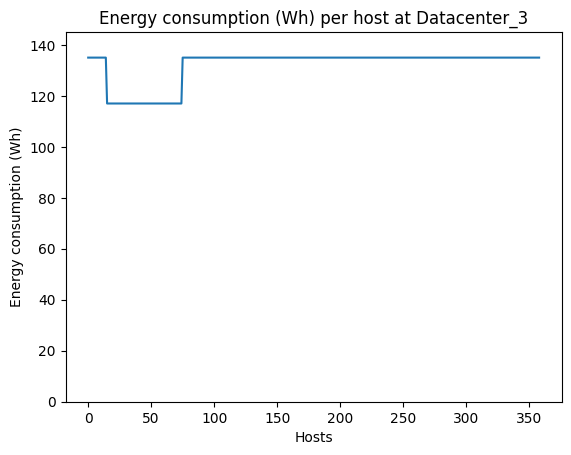

The datacenter 'Datacenter_4' current computing infrastructure at max can consume 63.303 kW per hour


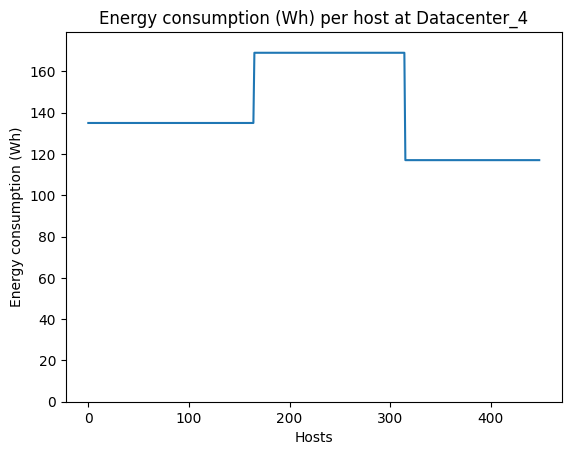

The cloud providers current computing infrastructure at max can consume 234.363 kW per hour


In [11]:
labels= np.unique(dataset['datacenter_name'])
max_power = 0
max_power_per_host = np.array([])
max_power_per_datacenter = np.array([])
for i in range(len(labels)):
    # max_power_per_datacenter = 0
    max_power_per_host_per_datacenter = np.array([])
    for _, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        power_model = sample['power_model'].split(",")
        # max_power_per_datacenter += float(power_model[-2])
        max_power_per_host = np.append(max_power_per_host, float(power_model[-2]))
        max_power_per_host_per_datacenter = np.append(max_power_per_host_per_datacenter, float(power_model[-2]))
    max_power_per_datacenter = np.append(max_power_per_datacenter, np.sum(max_power_per_host_per_datacenter))
    max_power += np.sum(max_power_per_host_per_datacenter)
    
    print(f"The datacenter '{labels[i]}' current computing infrastructure at max can consume {(np.sum(max_power_per_host_per_datacenter) * 1)/1000} kW per hour")
    plt.plot(np.arange(0, len(max_power_per_host_per_datacenter)), (max_power_per_host_per_datacenter*1))
    plt.ylim((0, max(max_power_per_host_per_datacenter)+10))
    plt.xlabel("Hosts")
    plt.ylabel("Energy consumption (Wh)")
    plt.title(f"Energy consumption (Wh) per host at {labels[i]}")
    plt.show()

print(f"The cloud providers current computing infrastructure at max can consume {(max_power * 1)/1000} kW per hour")

### Current Energy Consumption

The datacenter 'Datacenter_1' current computing infrastructure is consuming [57.21370982] kilo watts per hour


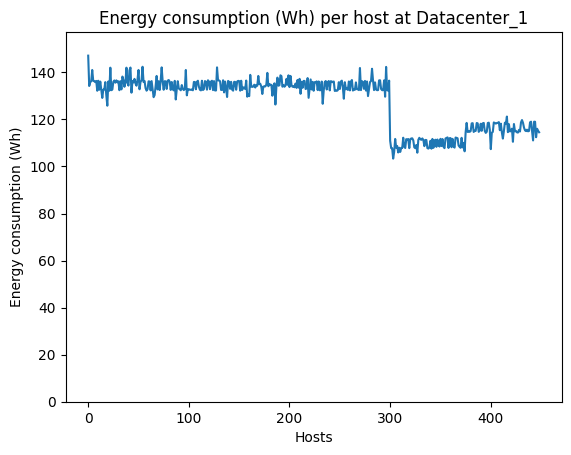

The datacenter 'Datacenter_2' current computing infrastructure is consuming [57.21370982 49.10551496] kilo watts per hour


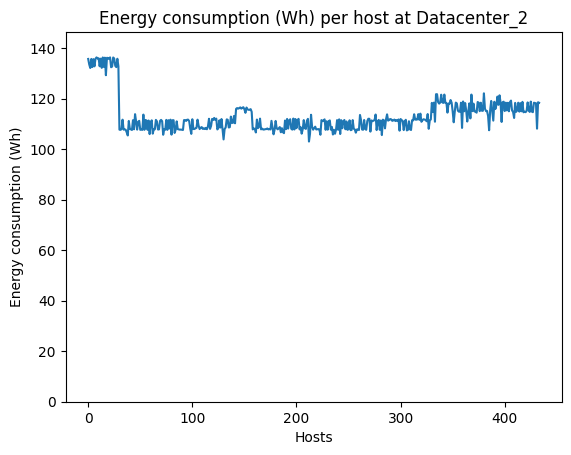

The datacenter 'Datacenter_3' current computing infrastructure is consuming [57.21370982 49.10551496 37.32582759] kilo watts per hour


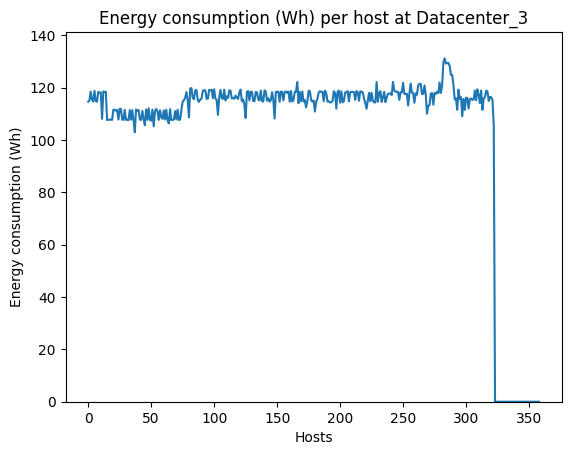

The datacenter 'Datacenter_4' current computing infrastructure is consuming [57.21370982 49.10551496 37.32582759 13.29274839] kilo watts per hour


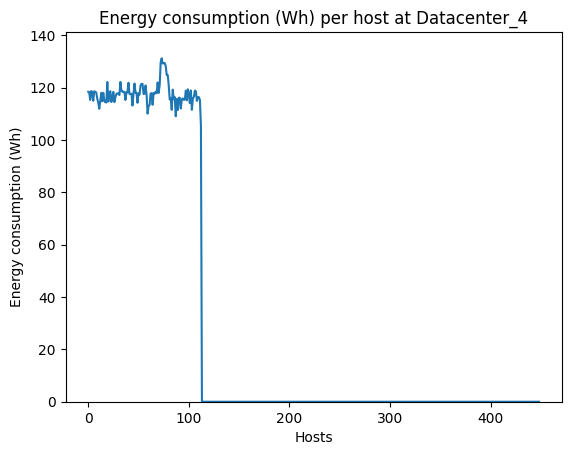

The cloud providers current computing infrastructure at max can consume 156.9378007513165 kilo watts per hour


In [12]:
labels= np.unique(dataset['datacenter_name'])
power = 0
power_per_host = np.array([])
power_per_datacenter = np.array([])
for i in range(len(labels)):
    # power_per_datacenter = 0
    power_per_host_per_datacenter = np.array([])
    for _, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        power_model = sample['power_model'].split(",")
        utilization = (sample['mips'] - sample['available_mips'])/sample['mips']
        if sample['active'] == False:
            power_per_host = np.append(power_per_host, 0)
            power_per_host_per_datacenter = np.append(power_per_host_per_datacenter, 0)
        elif utilization % 0.1 == 0:
            host_power = utilization * 10
            # power_per_datacenter += host_power
            power_per_host = np.append(power_per_host, host_power)
            power_per_host_per_datacenter = np.append(power_per_host_per_datacenter, host_power)
        else:
            utilization_floor = int(math.floor(utilization * 10))
            utilization_ceil = int(math.ceil(utilization * 10))
            power_floor = float(power_model[utilization_floor])
            power_ceil = float(power_model[utilization_ceil])
            
            diff = (power_ceil - power_floor) / 10
            host_power = power_floor + diff * (utilization - utilization_floor / 10) * 100
            
            # power_per_datacenter += host_power
            power_per_host = np.append(power_per_host, host_power)
            power_per_host_per_datacenter = np.append(power_per_host_per_datacenter, host_power)
    power_per_datacenter = np.append(power_per_datacenter, np.sum(power_per_host_per_datacenter))
    power += np.sum(power_per_host_per_datacenter)
    
    print(f"The datacenter '{labels[i]}' current computing infrastructure is consuming {(power_per_datacenter * 1)/1000} kilo watts per hour")
    plt.plot(np.arange(0, len(power_per_host_per_datacenter)), (power_per_host_per_datacenter*1))
    
    plt.ylim((0, max(power_per_host_per_datacenter)+10))
    plt.xlabel("Hosts")
    plt.ylabel("Energy consumption (Wh)")
    plt.title(f"Energy consumption (Wh) per host at {labels[i]}")
    plt.show()

print(f"The cloud providers current computing infrastructure at max can consume {(power * 1)/1000} kilo watts per hour")

### Reducing energy consumption by reducing the available CPU utilization

Note this would be done through approaches such as DVFS or Dynamic Voltage Frequency Scaling to reduce the available number of instructions per second by adjusting the CPU clock speed.

In [13]:
# labels = np.unique(dataset['datacenter_name'])

# # Energy-aware simulation with DVFS
# # Power_total = (1 - utilization)*power_idle + utilization*power_full
# # 1.60 1.867 2.133 2.40 2.67 (GHz) (Frequecy)
# # 1498 1748 1997 2247 2500 (MIPS)
# # 82.70 82.85 82.95 83.10 83.25 (Watts) (CPU idle)
# # 88.77 92.00 95.50 99.45 103.0 (Watts) (CPU Full)

# # cpu_mips_per_frequency = [1498, 1748, 1997, 2247, 2500]
# # cpu_idle_power_per_frequency = [82.70, 82.85, 82.95, 83.10, 83.25]
# # cpu_full_power_per_frequency = [88.77, 92.00, 95.50, 99.45, 103.0]

# DVFS_power = 0
# DVFS_power_per_host = np.array([])
# for i in range(len(labels)):
#     DVFS_power_per_datacenter = 0
#     DVFS_power_per_host_per_datacenter = np.array([])
#     for _, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
#         power_model = sample['power_model'].split(",")
#         frequencies = sample['frequencies'].split(",")
#         mips_per_frequency = sample['mips_per_frequency'].split(",")
#         cpu_idle_power_per_frequency = sample['cpu_idle_power_per_frequency'].split(",")
#         cpu_full_power_per_frequency = sample['cpu_full_power_per_frequency'].split(",")
        
#         DVFS_utilization = (sample['mips'] - sample['available_mips'])/sample['mips']
#         # if DVFS_utilization % 0.1 == 0:
#         #     DVFS_host_power = DVFS_utilization * 10
#         #     # power_per_datacenter += host_power
#         #     # power_per_host = np.append(power_per_host, host_power)
#         #     # power_per_host_per_datacenter = np.append(power_per_host_per_datacenter, host_power)
#         # else:
#         #     DVFS_utilization_floor = int(math.floor(utilization * 10))
#         #     DVFS_utilization_ceil = int(math.ceil(utilization * 10))
#         #     DVFS_power_floor = float(power_model[DVFS_utilization_floor])
#         #     DVFS_power_ceil = float(power_model[DVFS_utilization_ceil])
            
#         #     DVFS_diff = (DVFS_power_ceil - DVFS_power_floor) / 10
#         #     DVFS_host_power = DVFS_power_floor + DVFS_diff * (DVFS_utilization - DVFS_utilization_floor / 10) * 100
#         DVFS_host_power = (1 - DVFS_utilization) * float(power_model[0]) + DVFS_utilization * float(power_model[-2])
#         DVFS_power_per_datacenter += DVFS_host_power
#         DVFS_power_per_host = np.append(DVFS_power_per_host, DVFS_host_power)
#         DVFS_power_per_host_per_datacenter = np.append(DVFS_power_per_host_per_datacenter, DVFS_host_power)
        
#     print(f"The datacenter '{labels[i]}' current computing infrastructure is consuming {(DVFS_power_per_datacenter * 1)/1000} kilo watts per hour")
#     DVFS_power += power_per_datacenter
#     plt.plot(np.arange(0, len(DVFS_power_per_host_per_datacenter)), (DVFS_power_per_host_per_datacenter*1))
    
#     plt.ylim((0, max(DVFS_power_per_host_per_datacenter)+10))
#     plt.xlabel("Hosts")
#     plt.ylabel("Energy consumption (Wh)")
#     plt.title(f"Energy consumption (Wh) per host at {labels[i]}")
#     plt.show()

# print(f"The cloud providers current computing infrastructure at max can consume {(DVFS_power * 1)/1000} kilo watts per hour")

### Reducing the energy consumption by powering down active hosts 

Note! here host that are not utilized are assumed to be powered off to reduce to illustrate the energy efficiency of powering off inactive servers 

The datacenter 'Datacenter_1' current computing infrastructure is consuming [57.21370982] kilo watts per hour


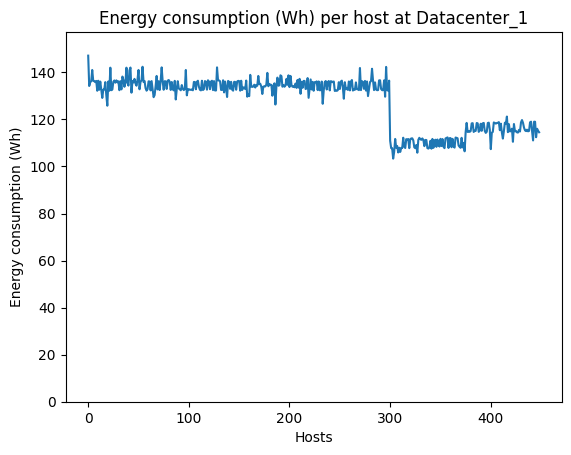

The datacenter 'Datacenter_2' current computing infrastructure is consuming [57.21370982 49.10551496] kilo watts per hour


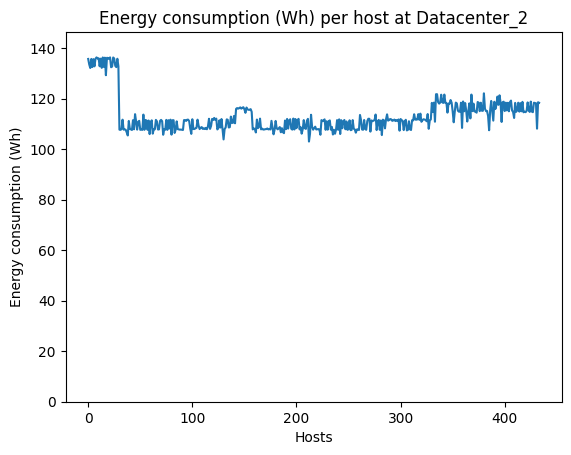

The datacenter 'Datacenter_3' current computing infrastructure is consuming [57.21370982 49.10551496 13.29274839] kilo watts per hour


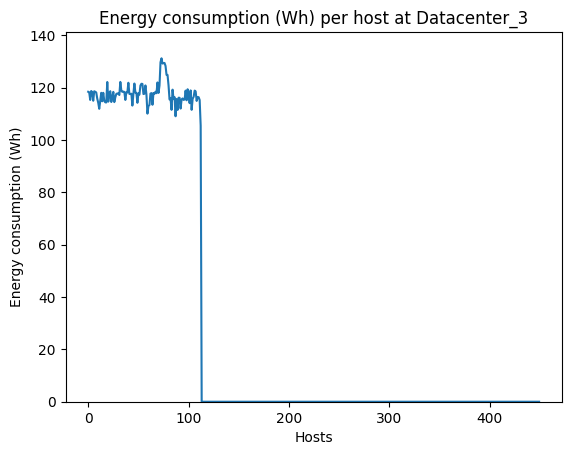

The datacenter 'Datacenter_4' current computing infrastructure is consuming [57.21370982 49.10551496 13.29274839 13.29274839] kilo watts per hour


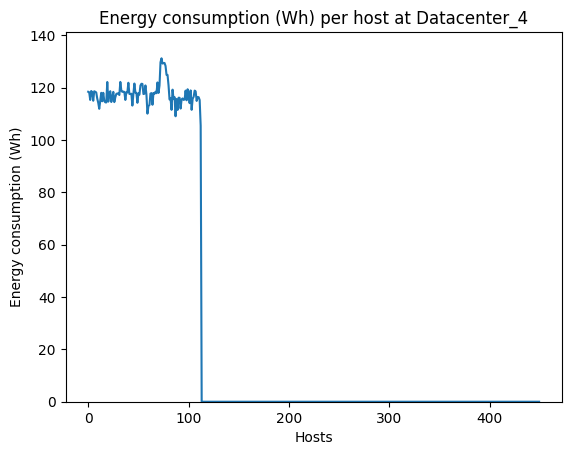

The cloud providers current computing infrastructure at max can consume 132.90472155491116 kilo watts per hour


In [14]:
labels= np.unique(dataset['datacenter_name'])
min_host_power = 0
min_host_power_per_host = np.array([])
min_host_power_per_datacenter = np.array([])
for i in range(len(labels)):
    # min_host_power_per_datacenter = 0
    min_host_power_per_host_per_datacenter = np.array([])
    for _, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        power_model = sample['power_model'].split(",")
        min_host_utilization = (sample['mips'] - sample['available_mips'])/sample['mips']
        
        if sample['active'] == False or len(sample['vms'].split(":")) == 0 or sample['available_mips'] == sample['mips']:
            min_host_host_power = 0
            # min_host_power_per_datacenter += host_power
            min_host_power_per_host = np.append(min_host_power_per_host, host_power)
            min_host_power_per_host_per_datacenter = np.append(power_per_host_per_datacenter, min_host_host_power)
        elif min_host_utilization % 0.1 == 0:
            min_host_host_power = min_host_utilization * 10
            # min_host_power_per_datacenter += min_host_host_power
            min_host_power_per_host = np.append(min_host_power_per_host, min_host_host_power)
            min_host_power_per_host_per_datacenter = np.append(min_host_power_per_host_per_datacenter, min_host_host_power)
        else:
            min_host_utilization_floor = int(math.floor(min_host_utilization * 10))
            min_host_utilization_ceil = int(math.ceil(min_host_utilization * 10))
            min_host_power_floor = float(power_model[min_host_utilization_floor])
            min_host_power_ceil = float(power_model[min_host_utilization_ceil])
            
            min_host_diff = (min_host_power_ceil - min_host_power_floor) / 10
            min_host_host_power = min_host_power_floor + min_host_diff * (min_host_utilization - min_host_utilization_floor / 10) * 100
            
            # min_host_power_per_datacenter += min_host_host_power
            min_host_power_per_host = np.append(min_host_power_per_host, min_host_host_power)
            min_host_power_per_host_per_datacenter = np.append(min_host_power_per_host_per_datacenter, min_host_host_power)
    min_host_power_per_datacenter = np.append(min_host_power_per_datacenter, np.sum(min_host_power_per_host_per_datacenter))
    min_host_power += np.sum(min_host_power_per_host_per_datacenter)
    
    print(f"The datacenter '{labels[i]}' current computing infrastructure is consuming {(min_host_power_per_datacenter * 1)/1000} kilo watts per hour")
    plt.plot(np.arange(0, len(min_host_power_per_host_per_datacenter)), (min_host_power_per_host_per_datacenter*1))
    plt.ylim((0, max(min_host_power_per_host_per_datacenter)+10))
    plt.xlabel("Hosts")
    plt.ylabel("Energy consumption (Wh)")
    plt.title(f"Energy consumption (Wh) per host at {labels[i]}")
    plt.show()

print(f"The cloud providers current computing infrastructure at max can consume {(min_host_power * 1)/1000} kilo watts per hour")

### Combined and Comparison

Saved energy consumption:
- Powering down hosts 24.03307919640534kW/s


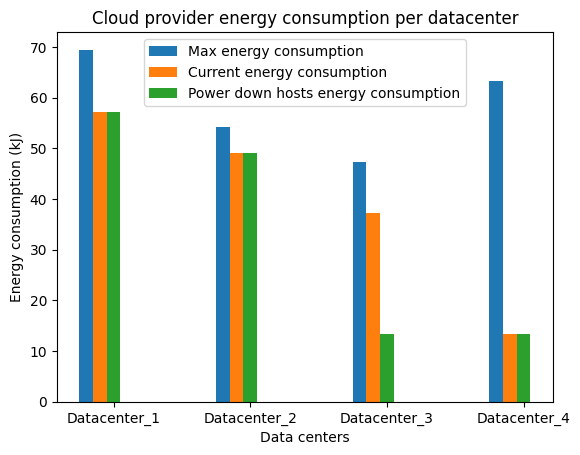

In [15]:
labels = np.unique(dataset['datacenter_name'])
print(f"Saved energy consumption:")
print(f"- Powering down hosts {(np.sum(power_per_datacenter)/1000) - (np.sum(min_host_power_per_datacenter)/1000)}kW/s")
# print(f"- DVFS {np.sum(power_per_host)/1000 - np.sum(min_host_power_per_host)/1000}kW/s")
# print(f"- powering down host and DVFS {np.sum(power_per_host)/1000 - np.sum(min_host_power_per_host)/1000}kW/s")

x = np.arange(len(labels))
bar_width = 0.1
plt.bar(x - 0.2, (max_power_per_datacenter / 1000) * 1, width=bar_width, label="Max energy consumption")
plt.bar(x - 0.1, (power_per_datacenter / 1000) * 1, width=bar_width, label="Current energy consumption")
plt.bar(x, (min_host_power_per_datacenter / 1000) * 1, width=bar_width, label="Power down hosts energy consumption")
# plt.bar(x + 0.1, (min_host_power_per_host / 1000) * 1, width=bar_width, label="DVFS energy consumption")
# plt.bar(x + 0.2, (min_host_power_per_host / 1000) * 1, width=bar_width, label="Power down hosts and DVFS energy consumption")
plt.xticks(np.arange(len(x)), labels)
plt.xlabel("Data centers")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption per datacenter")
plt.legend()
plt.show()

### Calculating Power Usage Effectiveness (PUE) for the physical hosts

In [16]:
print(f"Power Usage Effectiveness (PUE) (scoped to hosts) of approaches:")
print(f"- Powering down hosts {np.sum(max_power_per_datacenter) - np.sum(min_host_power_per_datacenter)}")
# print(f"- DVFS {np.sum(max_power_per_host) - np.sum(min_host_power_per_host)}")
# print(f"- Powering down hosts and DVFS {np.sum(max_power_per_host) - np.sum(min_host_power_per_host)}")

Power Usage Effectiveness (PUE) (scoped to hosts) of approaches:
- Powering down hosts 101458.27844508883
